# Day3. 머신러닝과 딥러닝

## 퍼셉트론을 활용한 머신러닝

In [12]:
import numpy as np

In [13]:
def AND(x1, x2):
    x = np.array([x1, x2]) # 입력
    w = np.array([0.5, 0.5]) # 가중치
    b = -0.7 # 편향
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [14]:
print(AND(0,0))
print(AND(0,1))
print(AND(1,0))
print(AND(1,1))

0
0
0
1


In [15]:
def NAND(x1, x2):
    x = np.array([x1, x2]) # 입력
    w = np.array([-0.5, -0.5]) # 가중치
    b = 0.7 # 편향
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [16]:
print(NAND(0,0))
print(NAND(0,1))
print(NAND(1,0))
print(NAND(1,1))

1
1
1
0


In [17]:
def OR(x1, x2):
    x = np.array([x1, x2]) # 입력
    w = np.array([0.5, 0.5]) # 가중치
    b = -0.2 # 편향
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [18]:
print(OR(0,0))
print(OR(0,1))
print(OR(1,0))
print(OR(1,1))

0
1
1
1


## 딥러닝을 활용한 XOR 문제 해결

In [22]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    return AND(s1, s2)

In [23]:
print(XOR(0,0)) # 0
print(XOR(0,1)) # 1
print(XOR(1,0)) # 1
print(XOR(1,1)) # 0

0
1
1
0


## Sin 값 예측하기

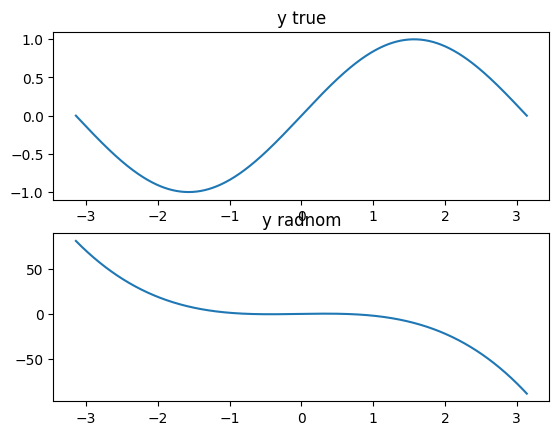

epoch1 loss:1018073.25
epoch101 loss:259.82220458984375
epoch201 loss:211.42466735839844
epoch301 loss:172.73411560058594
epoch401 loss:141.27572631835938
epoch501 loss:115.69705963134766
epoch601 loss:94.89965057373047
epoch701 loss:77.98924255371094
epoch801 loss:64.23966979980469
epoch901 loss:53.059940338134766
epoch1001 loss:43.96979522705078
epoch1101 loss:36.57878875732422
epoch1201 loss:30.56935691833496
epoch1301 loss:25.683107376098633
epoch1401 loss:21.7100830078125
epoch1501 loss:18.479732513427734
epoch1601 loss:15.853113174438477
epoch1701 loss:13.717451095581055
epoch1801 loss:11.98098373413086
epoch1901 loss:10.569087028503418


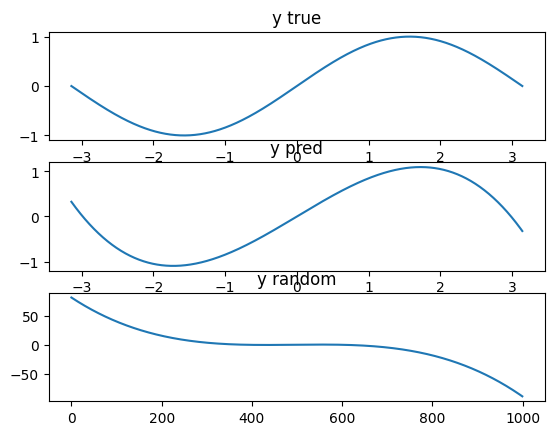

In [24]:
import math
import torch
import matplotlib.pyplot as plt

x = torch.linspace(-math.pi, math.pi, 1000)
y = torch.sin(x)

a = torch.randn(())
b = torch.randn(())
c = torch.randn(())
d = torch.randn(())

y_random = a * x**3 + b * x**2 + c * x + d

plt.subplot(2, 1, 1)
plt.title("y true")
plt.plot(x, y)

plt.subplot(2, 1, 2)
plt.title("y radnom")
plt.plot(x, y_random)
plt.show()

learning_rate = 1e-6

for epoch in range(2000):
   y_pred = a * x**3 + b * x**2 + c * x + d

   loss = (y_pred - y).pow(2).sum().item()
   if epoch % 100 == 0:
       print(f"epoch{epoch+1} loss:{loss}")

   grad_y_pred = 2.0 * (y_pred - y)
   grad_a = (grad_y_pred * x ** 3).sum()
   grad_b = (grad_y_pred * x ** 2).sum()
   grad_c = (grad_y_pred * x).sum()
   grad_d = grad_y_pred.sum()

   a -= learning_rate * grad_a
   b -= learning_rate * grad_b
   c -= learning_rate * grad_c
   d -= learning_rate * grad_d

plt.subplot(3, 1, 1)
plt.title("y true")
plt.plot(x, y)

plt.subplot(3, 1, 2)
plt.title("y pred")
plt.plot(x, y_pred)

plt.subplot(3, 1, 3)
plt.plot(y_random)
plt.title("y random")
plt.show()

## Using PyTorch

In [25]:
import pandas as pd
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import copy

### Loading the data, EDA and data preparation

In [31]:
df = pd.read_csv("./data/housing.csv")
df = df.dropna().reset_index(drop=True)
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [32]:
xDf = df[
    [
    "longitude",
     "latitude",
     "housing_median_age",
     "total_rooms",
     "total_bedrooms",
     "population",
     "households",
     "median_income"
    ]
]

df["median_house_value"] = df.apply(lambda row: float(row["median_house_value"] / float(100000)), axis=1)

yDf = df["median_house_value"]

X = xDf.values
y = yDf.values

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, shuffle = True)
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

### Architecture of the Neural Network

이 연습에서는 신경망의 고전적인 구조인 피라미드 구조를 사용하겠습니다. 이 유형의 신경망에서 각 숨겨진 레이어는 다음 레이어에 연결되며 각 레이어는 이전 레이어보다 작습니다. 입력 계층의 크기는 특징의 수와 같으며, 이 경우 8입니다. 이 예제에서는 하나의 목표(연속적인 값인 집 가격)를 예측하려고 하므로 마지막 계층에 뉴런 하나만 있습니다.

회귀 문제에서는 대상을 완벽하게 정확하게 예측할 수 없으므로 손실 함수로 MSE를 사용하는 것이 좋습니다.

### Defining the Model

이제 PyTorch를 사용해 모델을 피라미드 구조의 선형 레이어 시퀀스로 정의하겠습니다. 입력 레이어에는 8개의 뉴런(이것이 우리가 가진 특징의 수)과 단 하나의 출력 뉴런(이것이 우리의 목표인 집값)이 있다는 점에 유의하세요.

In [34]:
model = nn.Sequential(
    nn.Linear(8, 24),
    nn.ReLU(),
    nn.Linear(24, 12),
    nn.ReLU(),
    nn.Linear(12, 6),
    nn.ReLU(),
    nn.Linear(6, 1)
)

As a loss function we will use MSE and for the optimizer we will use Adam

In [35]:
loss_function = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

### Defining the training loop

In [36]:
epochs = 400
batchSize = 20

best_mse = np.inf
best_weights = None
history = []

size = X.shape[0]

for epoch in range(epochs):
    model.train()

    index = 0

    while index * batchSize <= size:
        X_batch = X_train[index:index + batchSize]
        y_batch = y_train[index:index + batchSize]

        y_pred = model(X_batch)

        loss = loss_function(y_pred, y_batch)

        optimizer.zero_grad()
        loss.backward()

        optimizer.step()

        index += batchSize

    model.eval()
    y_pred = model(X_test)
    mse = loss_function(y_pred, y_test)
    mse = float(mse)
    history.append(mse)
    if mse < best_mse:
        print(f"best mse is {mse} on epoch {epoch}")
        best_mse = mse
        best_weights = copy.deepcopy(model.state_dict())

model.load_state_dict(best_weights)

best mse is 6.128345966339111 on epoch 0
best mse is 4.747837066650391 on epoch 1
best mse is 4.726436138153076 on epoch 2
best mse is 4.378176212310791 on epoch 3
best mse is 4.287140369415283 on epoch 5
best mse is 4.082657337188721 on epoch 6
best mse is 3.8813700675964355 on epoch 7
best mse is 3.604973316192627 on epoch 8
best mse is 2.6447768211364746 on epoch 9
best mse is 2.5121638774871826 on epoch 10
best mse is 1.7982743978500366 on epoch 11
best mse is 1.647772192955017 on epoch 12
best mse is 1.5655877590179443 on epoch 13
best mse is 1.4794301986694336 on epoch 14
best mse is 1.4520149230957031 on epoch 15
best mse is 1.4172937870025635 on epoch 16
best mse is 1.3881410360336304 on epoch 17
best mse is 1.3622167110443115 on epoch 18
best mse is 1.2826541662216187 on epoch 19
best mse is 1.2210208177566528 on epoch 20
best mse is 1.1112759113311768 on epoch 21
best mse is 1.1039745807647705 on epoch 22
best mse is 1.0982367992401123 on epoch 23
best mse is 1.09632790088653

<All keys matched successfully>

In [37]:
print("MSE: %.4f" % best_mse)

MSE: 0.5355


MSE의 경우, 값이 100000으로 나뉘어져 있으므로 실제 가치는 약 50000 달러이다.

### Plotting the learning curve

Text(0, 0.5, 'Epoch')

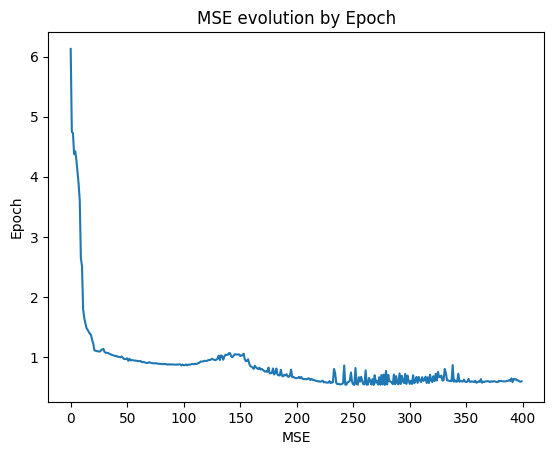

In [38]:
plt.plot(history)
plt.title("MSE evolution by Epoch")
plt.xlabel("MSE")
plt.ylabel("Epoch")